In [11]:
import joblib
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt

import prepare_data

In [8]:
X_train, X_test, y_train, y_test = prepare_data.get_training_data()

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, "random_forest_model.joblib")

# Train and save Support Vector Machine model
# Remove rows with NaN values in X_train
X_train_svm = X_train.dropna()
# Ensure y_train is aligned with the updated X_train
y_train_svm = y_train.loc[X_train_svm.index]
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_svm, y_train_svm)
joblib.dump(svm_model, "svm_model.joblib")

lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on X_train and y_train
lr_model.fit(X_train_svm, y_train_svm)
joblib.dump(lr_model, "lr_model.joblib")



['lr_model.joblib']

In [10]:
# Predict on the test data
X_test_output = X_test.copy()
rf_model_loaded = joblib.load("random_forest_model.joblib")
rf_predictions = rf_model_loaded.predict(X_test)
X_test_output['SalePriceRF'] = rf_predictions

# Remove rows with NaN values in X_test
X_test_svm = X_test.dropna()
X_test_output_svm = X_test_svm.copy()

# Ensure y_test is aligned with the updated X_test
y_test_svm = y_test.loc[X_test_svm.index]
svm_model_loaded = joblib.load("svm_model.joblib")
svm_predictions = svm_model_loaded.predict(X_test_svm)
X_test_output_svm['SalePriceSVM'] = svm_predictions
# Ensure y_test is aligned with the updated X_test

lr_model_loaded = joblib.load("lr_model.joblib")
lr_predictions = lr_model.predict(X_test_svm)
X_test_output_svm['SalePriceLR'] = lr_predictions

# Calculate the mean squared error
rf_mse = mean_squared_error(y_test, rf_predictions)
# Calculate the root mean squared error
rf_rmse = np.sqrt(rf_mse)
# Print the result
print(f"Root Mean Squared Error of Random Forest: {rf_rmse}")

svm_mse = mean_squared_error(y_test_svm, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
print(f"Root Mean Squared Error of SVM: {svm_rmse}")

lr_mse = mean_squared_error(y_test_svm, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
print(f"Root Mean Squared Error of LR: {lr_rmse}")



Root Mean Squared Error of Random Forest: 28931.374675911215
Root Mean Squared Error of SVM: 87042.5209575493
Root Mean Squared Error of LR: 45033.975657178875


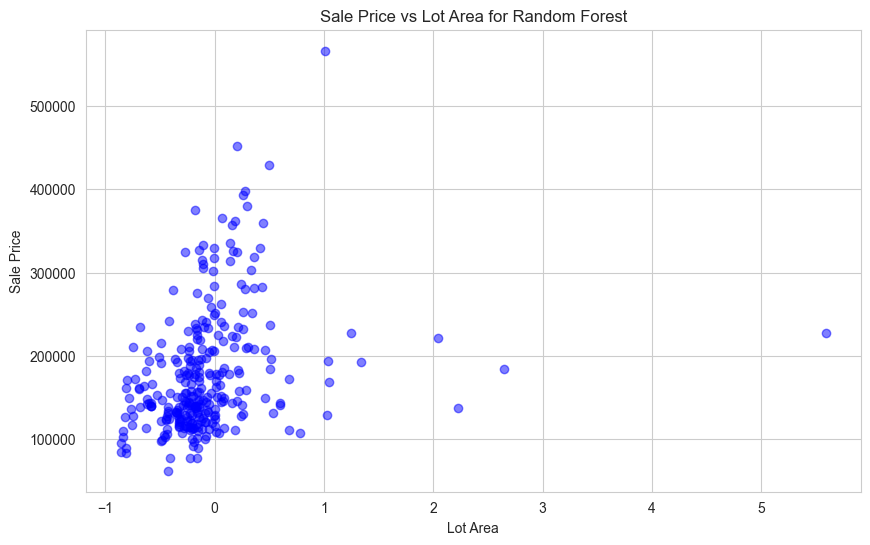

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_output['LotArea'], X_test_output['SalePriceRF'], alpha=0.5, color='blue')
plt.title('Sale Price vs Lot Area for Random Forest')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()